<a href="https://colab.research.google.com/github/smth-27/Stock_Price_Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from google.colab import drive

import io
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
path = '/content/drive/MyDrive/dataset/1613615-Stock_Price_data_set.csv'

In [ ]:
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.shape

(1009, 7)

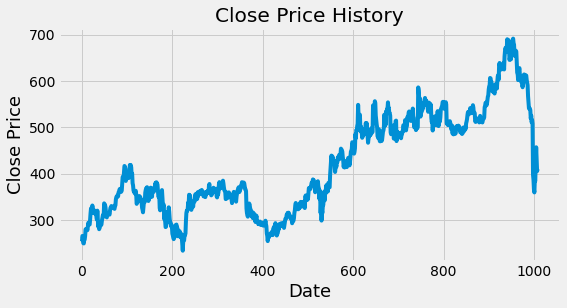

In [ ]:
#closing price history
plt.figure(figsize=(8,4))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close']) #new dataframe with only close cloumn
dataset = data.values       #convert thedataframe into a numpy array
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

808

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
#create training dataset
train_data = scaled_data[0:training_data_len, :]
#spliting the data into two datasets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [ ]:
#convert train datasets to numpy array
x_train= np.array(x_train)
y_train= np.array(y_train)
x_train
y_train

array([0.1736091 , 0.16996133, 0.18830954, 0.20178678, 0.20316291,
       0.21061135, 0.20908237, 0.2022236 , 0.20674514, 0.20150281,
       0.20600248, 0.19951508, 0.19724337, 0.21393155, 0.21349466,
       0.24210916, 0.25209149, 0.25646011, 0.25305259, 0.26137482,
       0.25713724, 0.27533254, 0.27943906, 0.28815444, 0.29175861,
       0.27854348, 0.27673053, 0.27865273, 0.28385134, 0.31901878,
       0.34728379, 0.34533979, 0.34188853, 0.37373584, 0.39946704,
       0.39658373, 0.38708196, 0.32895744, 0.36152555, 0.34186674,
       0.35285382, 0.34413837, 0.35888248, 0.34215064, 0.35934124,
       0.38087852, 0.40429435, 0.39699876, 0.40359536, 0.39234616,
       0.35368381, 0.36390644, 0.31803588, 0.30853411, 0.28472512,
       0.27777896, 0.28129573, 0.26963151, 0.28175442, 0.28223497,
       0.26502258, 0.22079026, 0.22622924, 0.22826063, 0.24162861,
       0.23854872, 0.25565193, 0.25763959, 0.24842179, 0.25224434,
       0.24462111, 0.23466065, 0.22631656, 0.20209255, 0.19344

In [ ]:
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 13s 15ms/step - loss: 0.0032


In [ ]:
#create the test dataset
#new array containing scaled values from 748 to 1009
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert data into numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#RMS error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.175155541618082

In [ ]:
#plot the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


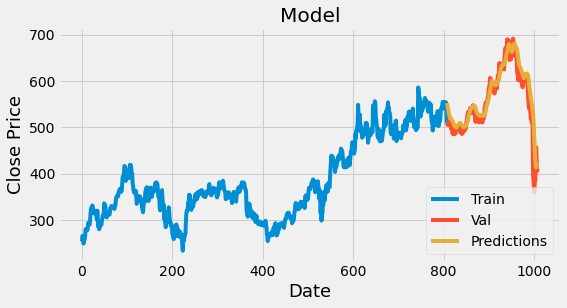

In [ ]:
#visualize the data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')

In [ ]:
#valid and predicted prices
valid

,Close,Predictions
808,508.779999,552.601135
809,505.549988,546.176086
810,510.299988,539.300354
811,505.549988,533.606750
812,506.519989,528.562439
...,...,...
1004,427.140015,416.935486
1005,457.130005,413.327209
1006,429.480011,417.867584
1007,405.600006,422.567657


In [ ]:
#quote
stock_quote = pd.read_csv(path)
#new dataframe
new_df =stock_quote.filter(['Close'])
#convert last 60 days closing price values into numpy array
last_60_days = new_df[-60:].values
last_60_days_scaled= scaler.transform(last_60_days)
X_test= []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
#predicted price for the next day to the last day in the data set
pred_price

array([[424.4419]], dtype=float32)